# Optimizing Revenue Leakage & Profitability in the Hospitality Sector 
### THEORITICAL NOTEBOOK (TREND ANALYSIS)

In [278]:
import pandas as pd
import numpy as np

In [6]:
hotel=pd.read_csv('dim_hotels.csv')
date=pd.read_csv('dim_date.csv')
room=pd.read_csv('dim_rooms.csv')
agg_booking=pd.read_csv('fact_aggregated_bookings.csv')
booking=pd.read_csv('fact_bookings.csv')

In [7]:
hotel.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [29]:
hotel.shape

(25, 4)

In [10]:
date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [237]:
date.shape

(92, 4)

In [21]:
room.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [23]:
room.shape

(4, 2)

In [14]:
agg_booking.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19


In [25]:
agg_booking.shape

(9200, 5)

In [16]:
booking.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [27]:
booking.shape

(134590, 12)

In [246]:
booking['booking_date'].value_counts()

booking_date
2022-06-08    1670
2022-05-07    1665
2022-05-05    1633
2022-07-01    1628
2022-07-02    1612
              ... 
2022-04-15      73
2022-04-14      67
2022-04-07      31
2022-04-08      19
2022-04-09      17
Name: count, Length: 116, dtype: int64

# Data Analysis

## What is the average number of guests per booking for each property?

In [48]:
booking.groupby('property_id')['no_guests'].mean().reset_index()

,property_id,no_guests
0,16558,2.232160
1,16559,2.268874
2,16560,1.662476
3,16561,2.286102
4,16562,2.260581
5,16563,1.668532
6,17558,2.259333
7,17559,2.263432
8,17560,1.659571
9,17561,2.247154


## Which booking platforms drive the most bookings per property?

In [57]:
booking.groupby('booking_platform')['booking_id'].count().reset_index().sort_values(by='booking_id' )

,booking_platform,booking_id
0,direct offline,6755
2,journey,8106
6,tripster,9630
1,direct online,13379
3,logtrip,14756
4,makeyourtrip,26898
5,others,55066


## Are customers from certain platforms more likely to cancel?

In [95]:
cancel=booking[booking['booking_status']=='Cancelled']
cancel.groupby('booking_platform')['booking_status'].count().reset_index().sort_values(by='booking_status' ,ascending=False)

,booking_platform,booking_status
5,others,13698
4,makeyourtrip,6722
3,logtrip,3586
1,direct online,3344
6,tripster,2407
2,journey,2009
0,direct offline,1654


## Which room categories are preferred by guests who give high ratings?

###  TOTAL SUM OF RATINGS

In [97]:
booking.groupby('room_category')['ratings_given'].sum().reset_index().sort_values(by='ratings_given' ,ascending=False)

,room_category,ratings_given
1,RT2,74980.0
0,RT1,58970.0
2,RT3,45820.0
3,RT4,25366.0


### COUNT OF RATING MEANS NO. OF TIMES RATING GIVEN

In [104]:
booking.groupby('room_category')['ratings_given'].count().reset_index().sort_values(by='ratings_given' ,ascending=False)

,room_category,ratings_given
1,RT2,20811
0,RT1,16237
2,RT3,12755
3,RT4,6880


# Do bookings on weekends differ significantly in terms of guest count?

## What is the revenue per booking across different room categories?


#### Revenue realized per boking for different types of room

In [172]:
booking.groupby('room_category')['revenue_realized'].mean().reset_index()

,room_category,revenue_realized
0,RT1,8052.356422
1,RT2,11317.467003
2,RT3,15120.275600
3,RT4,23440.103652


### How does revenue generated compare to revenue realized per booking?


In [170]:
booking.groupby('room_category')[['revenue_generated','revenue_realized']].mean().reset_index()

,room_category,revenue_generated,revenue_realized
0,RT1,9455.995292,8052.356422
1,RT2,13310.699121,11317.467003
2,RT3,17784.395734,15120.275600
3,RT4,27465.751260,23440.103652


### Which properties have the highest revenue ?

In [211]:
booking.groupby('property_id')[['revenue_generated','revenue_realized']].sum().reset_index().sort_values(by='revenue_realized' ,ascending=False)

,property_id,revenue_generated,revenue_realized
1,16559,138698580,118448418
11,17563,118616735,101511080
7,17559,109696920,93996570
5,16563,105200620,89135998
8,17560,103776330,87996216
23,19562,96540375,82443540
21,19560,97486125,81876345
6,17558,88430770,74730742
9,17561,86646790,73918312
22,19561,85807575,72963360


In [177]:
booking.groupby('property_id')[['revenue_generated','revenue_realized']].mean().reset_index()

,property_id,revenue_generated,revenue_realized
0,16558,13400.482081,11437.098636
1,16559,18901.414554,16141.784955
2,16560,13666.780311,11705.130620
3,16561,15520.242191,13113.037574
4,16562,13753.707469,11709.039419
5,16563,14719.549461,12471.806072
6,17558,17559.723987,14839.305401
7,17559,17860.130251,15303.902638
8,17560,17258.661234,14634.328289
9,17561,16717.497588,14261.684739


##  Sucessfull booking ratio

In [222]:
agg_booking.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19


In [224]:
abc=agg_booking.groupby('property_id').sum()

In [226]:
abc['sucess_ratio']=abc['successful_bookings']/abc['capacity']

In [228]:
abc['sucess_ratio']

property_id
16558    0.659072
16559    0.659181
16560    0.536957
16561    0.657832
16562    0.534605
16563    0.663973
17558    0.536658
17559    0.660999
17560    0.531372
17561    0.662788
17562    0.448402
17563    0.662312
17564    0.446212
18558    0.534520
18559    0.446332
18560    0.661947
18561    0.656034
18562    0.658732
18563    0.529807
19558    0.444027
19559    0.538330
19560    0.656456
19561    0.532887
19562    0.658062
19563    0.534881
Name: sucess_ratio, dtype: float64

## Cancellation ratio

In [231]:
abc['cancellation_ratio']=1-abc['successful_bookings']/abc['capacity']

In [507]:
abc['cancellation_ratio'].sort_values().reset_index()

,property_id,cancellation_ratio
0,16563,0.336027
1,17561,0.337212
2,17563,0.337688
3,18560,0.338053
4,17559,0.339001
5,16559,0.340819
6,16558,0.340928
7,18562,0.341268
8,19562,0.341938
9,16561,0.342168


# Date

In [248]:
df= booking.copy()

In [250]:
df

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300


In [252]:
df['booking_date']=pd.to_datetime(df['booking_date'])

In [266]:
import datetime

In [272]:
df['day_name']=df['booking_date'].dt.day_name()

In [334]:
df['month_name']=df['booking_date'].dt.month_name()

In [409]:
df['week_no']=df['booking_date'].dt.isocalendar().week

In [411]:
df

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,day_name,day_type,month_name,week_no
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Wednesday,Weekday,April,17
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Saturday,Weekend,April,17
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Thursday,Weekday,April,17
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Thursday,Weekday,April,17
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Wednesday,Weekday,April,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Friday,Weekday,July,30
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760,Saturday,Weekend,July,30
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920,Saturday,Weekend,July,30
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300,Friday,Weekday,July,30


In [282]:
df['day_type']=np.where(df['day_name'].isin(['Saturday','Sunday']),'Weekend','Weekday')

In [284]:
df

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,day_name,day_type
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Wednesday,Weekday
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Saturday,Weekend
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Thursday,Weekday
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Thursday,Weekday
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Wednesday,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Friday,Weekday
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760,Saturday,Weekend
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920,Saturday,Weekend
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300,Friday,Weekday


## How does revenue fluctuate by day type (weekday vs. weekend)?

## total

In [291]:
df.groupby('day_type')[['revenue_generated','revenue_realized']].sum()

,revenue_generated,revenue_realized
day_type,,
Weekday,1415153245,1205761405
Weekend,592392970,503009824


## Average 

In [293]:
df.groupby('day_type')[['revenue_generated','revenue_realized']].mean()

,revenue_generated,revenue_realized
day_type,,
Weekday,14896.349947,12692.225316
Weekend,14963.197019,12705.476737


## Are there room categories generating high bookings but low revenue?



In [330]:
a=df.groupby('room_category')['booking_status'].count().reset_index()


In [332]:
b=df.groupby('room_category')[['revenue_generated','revenue_realized']].sum().reset_index()


In [328]:
pd.merge(a, b, left_index=True, right_index=True, how='inner')


,room_category_x,booking_status,room_category_y,revenue_generated,revenue_realized
0,RT1,38446,RT1,363545195,309580895
1,RT2,49505,RT2,658946160,560271204
2,RT3,30566,RT3,543597840,462166344
3,RT4,16073,RT4,441457020,376752786


## What are the peak booking months for each property?

In [362]:
april =df[df['month_name']=='April']
april.groupby('property_id')['month_name'].count().reset_index().sort_values(by='month_name')

,property_id,month_name
12,17564,99
2,16560,114
18,18563,120
24,19563,135
21,19560,143
8,17560,143
15,18560,171
10,17562,174
0,16558,176
11,17563,182


In [364]:
may =df[df['month_name']=='May']
may.groupby('property_id')['month_name'].count().reset_index().sort_values(by='month_name')

,property_id,month_name
0,16558,1033
10,17562,1155
12,17564,1330
3,16561,1475
13,18558,1475
19,19558,1496
20,19559,1552
2,16560,1571
4,16562,1587
18,18563,1598


In [366]:
june =df[df['month_name']=='June']
june.groupby('property_id')['month_name'].count().reset_index().sort_values(by='month_name')

,property_id,month_name
0,16558,1049
10,17562,1135
12,17564,1316
19,19558,1446
3,16561,1450
13,18558,1500
2,16560,1554
20,19559,1568
18,18563,1570
4,16562,1624


In [368]:
july =df[df['month_name']=='July']
july.groupby('property_id')['month_name'].count().reset_index().sort_values(by='month_name')

,property_id,month_name
0,16558,895
10,17562,960
19,19558,1209
12,17564,1237
13,18558,1251
3,16561,1260
20,19559,1331
4,16562,1360
6,17558,1418
18,18563,1440


## Are there clear seasonality trends in booking volume or revenue?

In [372]:
c=df.groupby('month_name')['booking_id'].count()

In [394]:
d=df.groupby('month_name')[['revenue_generated','revenue_realized']].sum()

In [396]:
pd.merge(c, d, left_index=True, right_index=True, how='inner')

,booking_id,revenue_generated,revenue_realized
month_name,,,
April,5716,84891900,71613369
July,39167,585087620,499184195
June,44578,664656710,564754400
May,45129,672909985,573219265


## ow does the number of successful bookings change week-to-week?

<Axes: xlabel='week_no'>

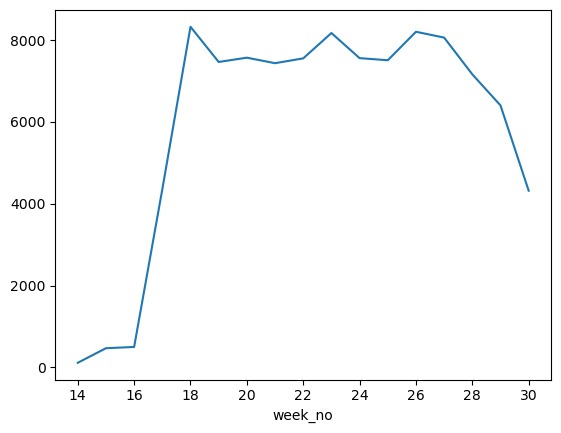

In [419]:
sucess_booking =df[df['booking_status']!='Cancelled']
sucess_booking.groupby('week_no')['booking_status'].count().plot(kind='line')

## Is there an upward or downward trend in ratings over time?

<Axes: xlabel='week_no'>

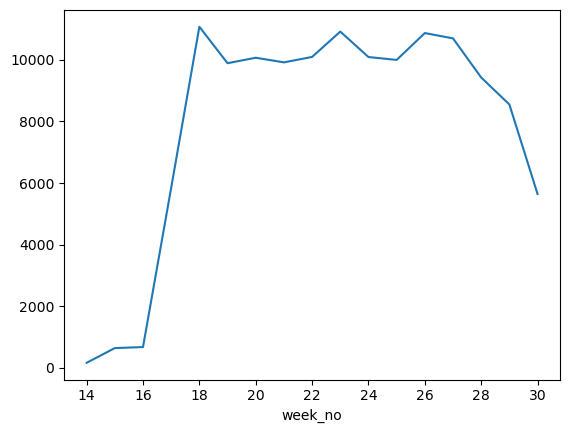

In [432]:
df.groupby('week_no')['checkout_date'].count().plot(kind='line')

## Which city has the best-performing hotel in terms of revenue?

In [480]:
p=df.groupby('property_id')[['revenue_generated','revenue_realized']].sum().sort_values(by='revenue_realized',ascending=False)


In [476]:
# Merge the revenue table with hotel on 'property_id'
merged_df = p.merge(hotel[['property_id', 'property_name','category','city']], on='property_id', how='outer')



In [482]:
merged_df.sort_values(by='revenue_realized',ascending=True)

,property_id,revenue_generated,revenue_realized,property_name,category,city
0,16558,42251720,36061172,Atliq Grands,Luxury,Delhi
18,18563,53133300,44838780,Atliq Palace,Business,Hyderabad
13,18558,54289300,46246510,Atliq Grands,Luxury,Hyderabad
14,18559,56049500,47844020,Atliq Exotica,Luxury,Hyderabad
10,17562,61333960,51914158,Atliq Bay,Luxury,Mumbai
19,19558,63782025,54494340,Atliq Grands,Luxury,Bangalore
2,16560,64138200,54932178,Atliq City,Business,Delhi
16,18561,65615250,56040450,Atliq Blu,Luxury,Hyderabad
4,16562,66292870,56437570,Atliq Bay,Luxury,Delhi
3,16561,68568430,57933400,Atliq Blu,Luxury,Delhi


## Are any room categories overbooked or underutilized regularly?
## Do certain room classes attract more guests than others?

In [485]:
df

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,day_name,day_type,month_name,week_no
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Wednesday,Weekday,April,17
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Saturday,Weekend,April,17
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Thursday,Weekday,April,17
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Thursday,Weekday,April,17
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Wednesday,Weekday,April,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Friday,Weekday,July,30
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760,Saturday,Weekend,July,30
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920,Saturday,Weekend,July,30
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300,Friday,Weekday,July,30


In [499]:
zz=df[df['booking_status']=='Checked Out']
zz.groupby('room_category')['booking_id'].count()

room_category
RT1    26967
RT2    34653
RT3    21447
RT4    11344
Name: booking_id, dtype: int64

## Which properties have the lowest average rating?

In [504]:
df.groupby('room_category')['ratings_given'].mean()

room_category
RT1    3.631829
RT2    3.602902
RT3    3.592317
RT4    3.686919
Name: ratings_given, dtype: float64

In [509]:
df

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,day_name,day_type,month_name,week_no
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Wednesday,Weekday,April,17
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Saturday,Weekend,April,17
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Thursday,Weekday,April,17
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Thursday,Weekday,April,17
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Wednesday,Weekday,April,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Friday,Weekday,July,30
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760,Saturday,Weekend,July,30
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920,Saturday,Weekend,July,30
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300,Friday,Weekday,July,30


## Are cancellations more common for specific room categories?

In [519]:
cancel=booking[booking['booking_status']=='Cancelled']
cancel.groupby('room_category')['booking_status'].count().reset_index().sort_values(by='booking_status' ,ascending=False)

,room_category,booking_status
1,RT2,12357
0,RT1,9530
2,RT3,7605
3,RT4,3928


## What is the average realized revenue vs. generated revenue per month?

In [525]:
df.groupby('month_name')[['revenue_generated','revenue_realized']].sum()

,revenue_generated,revenue_realized
month_name,,
April,84891900,71613369
July,585087620,499184195
June,664656710,564754400
May,672909985,573219265


## Do high guest-count bookings generate proportionally more revenue?

In [530]:
df.groupby('no_guests')[['revenue_generated','revenue_realized']].sum()

,revenue_generated,revenue_realized
no_guests,,
1,637352700,542538300
2,858836300,730529150
3,236516115,201593733
4,197620380,168824556
5,36236980,30648202
6,40983740,34637288


## What is the lost revenue from unutilized capacity across properties?

In [535]:
agg_booking['remaining']=agg_booking['capacity']-agg_booking['successful_bookings']

### Remaining Capacity

In [551]:
aa=agg_booking.groupby('room_category')['remaining'].sum().reset_index()
aa

,room_category,remaining
0,RT1,27978
1,RT2,36423
2,RT3,22518
3,RT4,11067


### Average revenue from each category

In [553]:
bb=booking.groupby('room_category')['revenue_realized'].mean().reset_index()
bb

,room_category,revenue_realized
0,RT1,8052.356422
1,RT2,11317.467003
2,RT3,15120.275600
3,RT4,23440.103652


In [ ]:
alpha =pd.DataFrame()
alpha['avg_lost_rev']=aa['remaining']*bb['']